In [2]:
import pandas as pd
train = pd.read_csv('trainify.csv')
print("Training Set:"% train.columns, train.shape, len(train))

Training Set: (5203, 12) 5203


In [13]:
# test = pd.read_csv('testuu.csv')
# print("Test Set:"% test.columns, test.shape, len(test))

In [ ]:
test

,ID,Tweet
0,1,anal
1,2,anus
2,3,arse
3,4,ass
4,5,ballsack
...,...,...
130,131,xnxx
131,132,xhamster
132,133,Dildo
133,134,Cigarettes


#### Data Cleaning

In [3]:
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
# test_clean = clean_text(test, "Tweet")
train_clean = clean_text(train, "Tweet")

TypeError: expected string or bytes-like object, got 'float'

In [ ]:
test_clean

,ID,Tweet
0,1,anal
1,2,anus
2,3,arse
3,4,ass
4,5,ballsack
...,...,...
130,131,xnxx
131,132,xhamster
132,133,dildo
133,134,cigarettes


In [ ]:
train_clean

,ID,Label,Tweet
0,1,1.0,anal
1,2,1.0,anus
2,3,1.0,arse
3,4,1.0,ass
4,5,1.0,ballsack
...,...,...,...
231,232,NaN,imposing
232,233,NaN,illustrious
233,234,NaN,ravishing
234,235,NaN,unfathomable


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Handling Imbalanced data

In [1]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['safe','mature']
data = [len(train_clean[train_clean.Label==0]),len(train_clean[train_clean.Label==1])]
ax.bar(langs,data)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
from sklearn.utils import resample
train_majority = train_clean[train_clean.Label==0]
train_minority = train_clean[train_clean.Label==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['Label'].value_counts()

1.0    93
0.0    93
Name: Label, dtype: int64

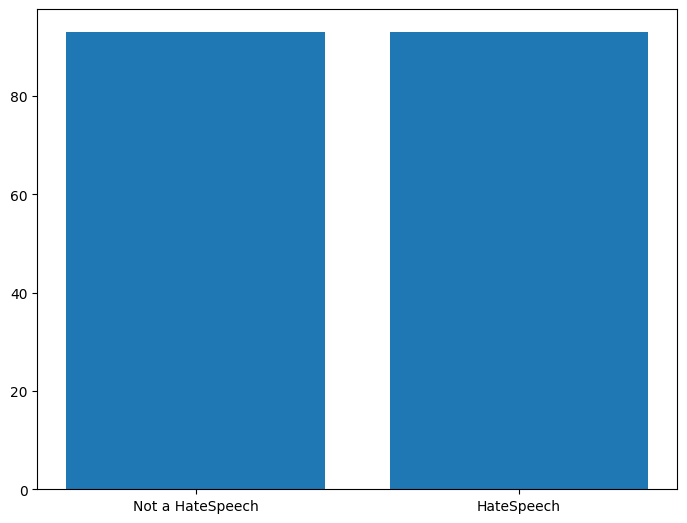

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['safe','mature']
data = [len(train_upsampled[train_upsampled.Label==0]),len(train_upsampled[train_upsampled.Label==1])]
ax.bar(langs,data)
plt.show()

#### Pipeline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', SGDClassifier()),])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train['Tweet'],
                                                    train['Label'],random_state = 0)

In [ ]:
model = pipeline_sgd.fit(X_train, y_train)



In [ ]:
# Compute TP, TN, FP, FN
TP = ((y_predict == 1) & (y_test == 1)).sum()
TN = ((y_predict == 0) & (y_test == 0)).sum()
FP = ((y_predict == 1) & (y_test == 0)).sum()
FN = ((y_predict == 0) & (y_test == 1)).sum()

# TP = ((y_predict == 0) & (y_test == 0)).sum()
# TN = ((y_predict == 1) & (y_test == 1)).sum()
# FP = ((y_predict == 0) & (y_test == 1)).sum()
# FN = ((y_predict == 1) & (y_test == 0)).sum()

# Print the evaluation metrics
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# Calculate accuracy, precision, recall, and F1 score
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

# Print the computed metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)